In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_rows
duplicate_ID = merged_data.loc[merged_data['Mouse ID'] == 'g989']
duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data.reset_index(drop=True, inplace=True)
rows_to_drop = duplicate_ID.index
merged_data.drop(rows_to_drop, inplace=True)
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = merged_data["Mouse ID"].nunique()
number_of_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_data["Drug Regimen"].unique()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_mean = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_var = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_std = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_data = {
    "Mean Tumor Volume": drug_mean,
    "Median Tumor Volume": drug_median,
    "Tumor Volume Variance": drug_var,
    "Tumor Volume Standard Deviation": drug_std,
    "Tumor Volume SEM": drug_sem
}

# Create a DataFrame from the dictionary
summary_df = pd.DataFrame(summary_data)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

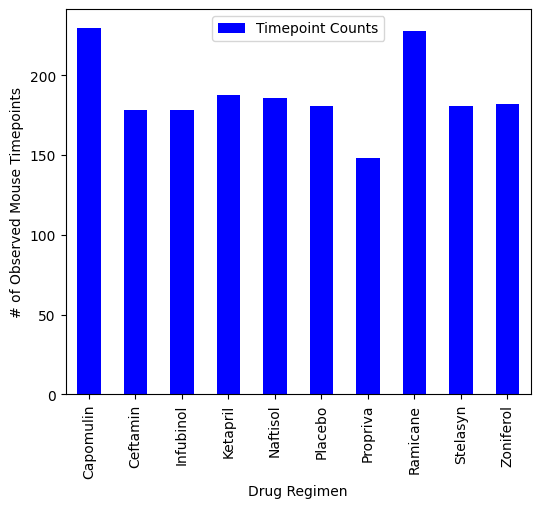

<Figure size 640x480 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = merged_data.groupby("Drug Regimen")["Timepoint"].count()
regimen = summary_df.index
regimen_counts = {"Drug Regimen": regimen, "Timepoint Counts": drug_counts}
regimen_counts_df = pd.DataFrame(regimen_counts)
regimen_counts_df = regimen_counts_df.set_index("Drug Regimen")
regimen_counts_df.plot(kind = "bar", facecolor = 'b', figsize = (6, 5), ylabel = "# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

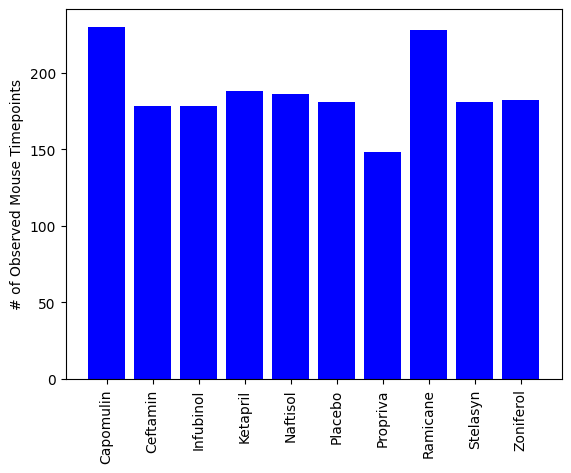

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(merged_data["Drug Regimen"].unique()))
y_axis = merged_data.groupby("Drug Regimen")["Timepoint"].count()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                            "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = "vertical")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, y_axis, color = 'b', align = "center")

plt.show()

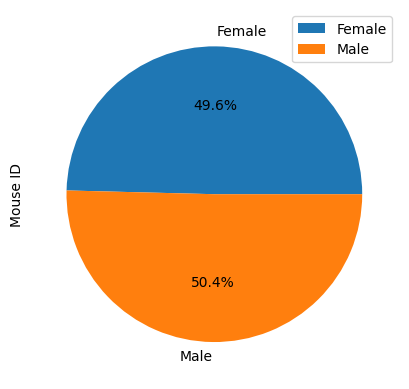

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_and_female = merged_data.groupby("Sex")["Mouse ID"].nunique()
male_and_female = pd.DataFrame(male_and_female)
male_and_female.plot(kind = "pie", y = "Mouse ID", autopct="%1.1f%%")
plt.show()

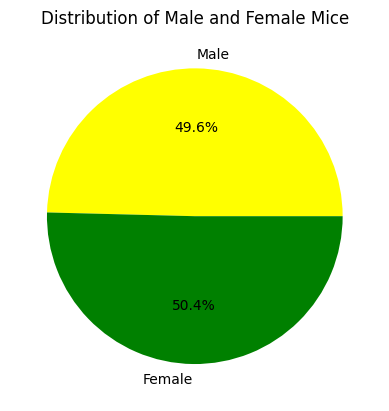

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
gender_count = male_and_female["Mouse ID"]
colors = ["yellow", "green"]
plt.pie(gender_count, labels=genders, colors=colors,
        autopct="%1.1f%%") 
plt.title("Distribution of Male and Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = merged_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, merged_data, on=['Mouse ID', 'Timepoint'], how='left')

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the final_tumor_volume DataFrame to include only the specified treatment regimens
filtered_data = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]
filtered_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
for drug in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = filtered_data.loc[filtered_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # Append the resulting final tumor volumes for each drug to the tumor_volume_data list
    tumor_volume_data.append(tumor_volumes)
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Potential outliers for {drug}: {outliers}")
    

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


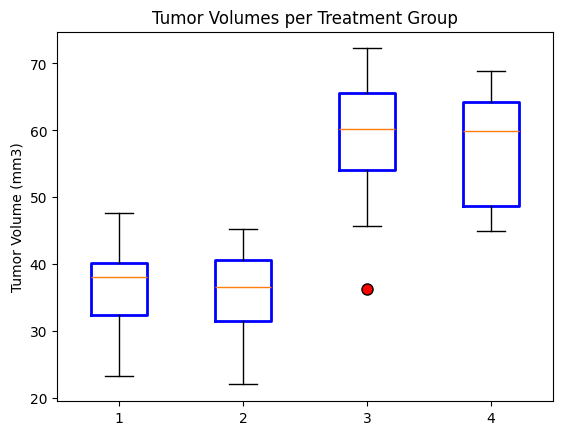

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes per Treatment Group')
ax1.set_ylabel('Tumor Volume (mm3)')
boxprops = dict(color='blue', linewidth=2)
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
ax1.boxplot(tumor_volume_data, boxprops=boxprops, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

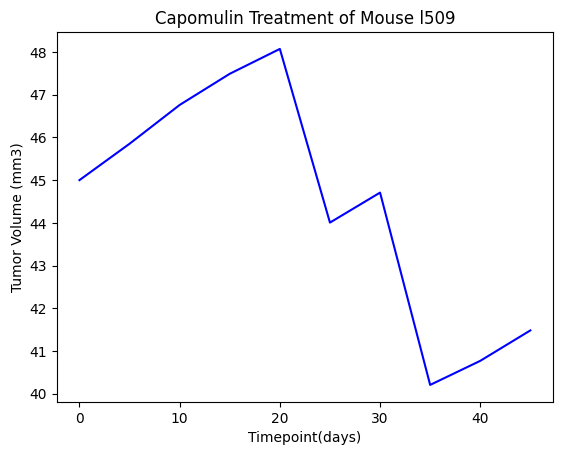

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_1 = merged_data.loc[merged_data['Mouse ID'] == 'l509']
x_axis = mouse_1["Timepoint"]
y_axis = mouse_1["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color = 'b')
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


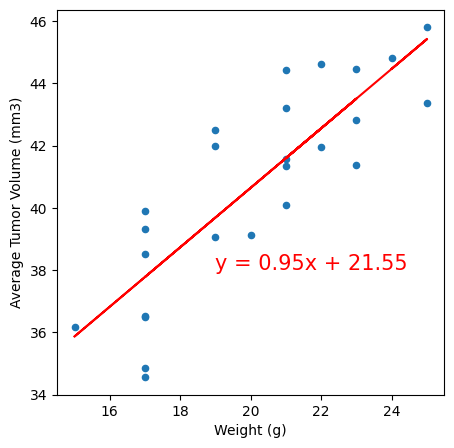

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']
average_cap_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df[["Mouse ID", "Weight (g)"]]
mouse_weight = mouse_weight.drop_duplicates()

capomulin_filtered = pd.merge(mouse_weight, average_cap_volume, on="Mouse ID")
capomulin_filtered.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"}, inplace=True)

capomulin_filtered.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=False, figsize=(5,5))

x_values = capomulin_filtered['Weight (g)']
y_values = capomulin_filtered['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19, 38),fontsize=15,color="red")

plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = capomulin_filtered.iloc[:,1]
volume = capomulin_filtered.iloc[:,2]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")

The correlation between weight and average tumor volume is 0.84
